In [2]:
# Loading the dataset and previewing the first few rows

input_data = pd.read_csv('Wholesale customers data.csv')
input_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [3]:
# Displaying the shape of the dataset

input_data.shape

(440, 8)

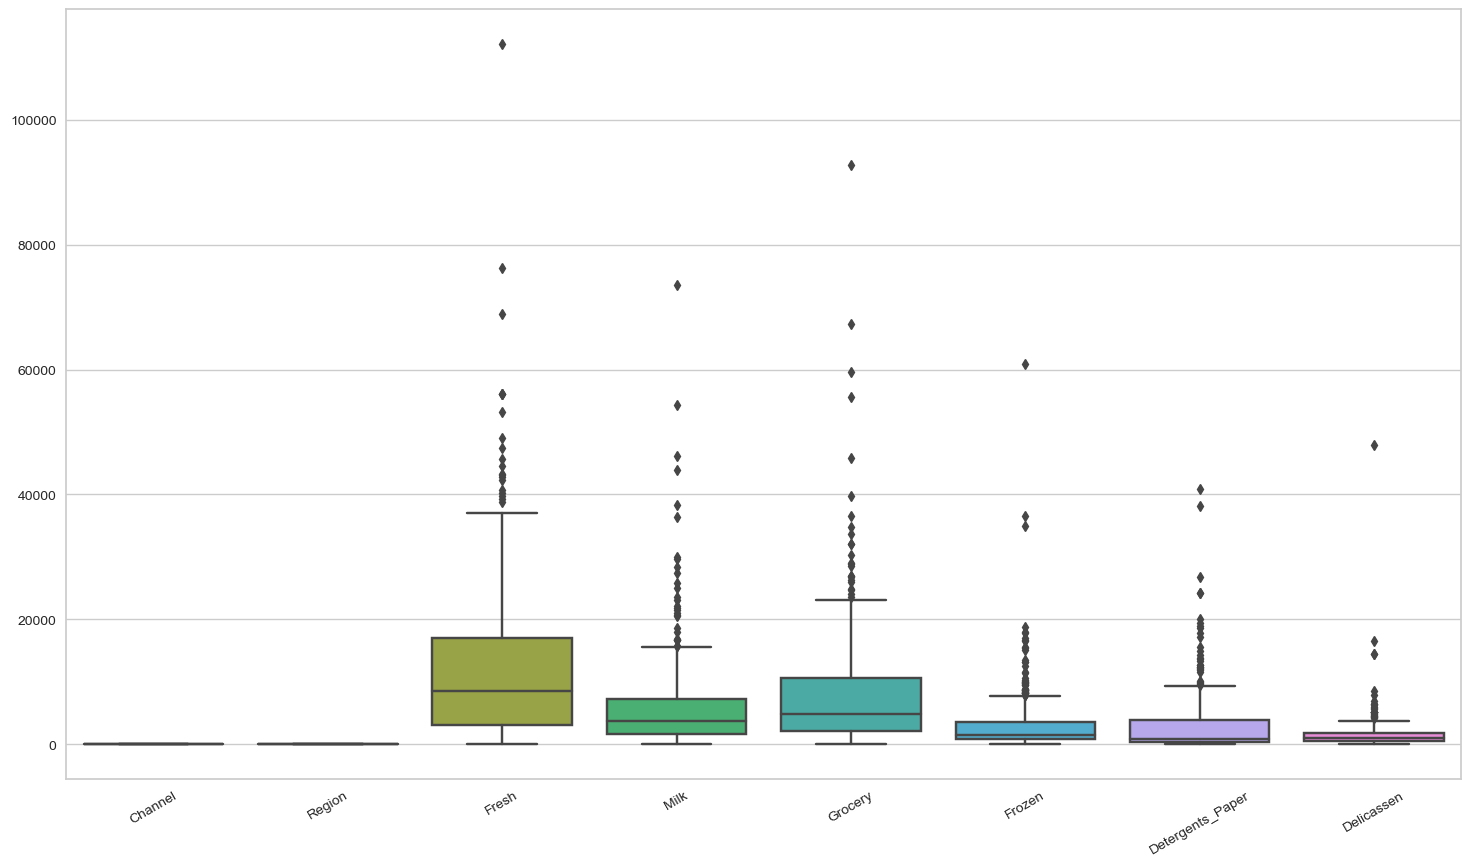

In [4]:
# Visualizing the distribution of features using boxplots

plt.figure(figsize=(18,10))
ax = sns.boxplot(data = input_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.show();

In [5]:
# Dropping irrelevant columns 'Channel' and 'Region'

input_data.drop(['Channel', 'Region'], axis=1, inplace=True)
input_data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [6]:
# Standardizing the features by scaling them 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(input_data)

In [7]:
# Performing K-means clustering with a specified number of clusters

km = KMeans(n_clusters=3)
km.fit(X_scaled)

# Assigning cluster labels to the data points

cluster_assignment = km.labels_
print(cluster_assignment)


C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [8]:
# Adding cluster labels to the dataset

input_data['KMCluster'] = cluster_assignment
print(input_data.head(10))

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  KMCluster
0  12669   9656     7561     214              2674        1338          1
1   7057   9810     9568    1762              3293        1776          1
2   6353   8808     7684    2405              3516        7844          1
3  13265   1196     4221    6404               507        1788          1
4  22615   5410     7198    3915              1777        5185          1
5   9413   8259     5126     666              1795        1451          1
6  12126   3199     6975     480              3140         545          1
7   7579   4956     9426    1669              3321        2566          1
8   5963   3648     6192     425              1716         750          1
9   6006  11093    18881    1159              7425        2098          0


In [9]:
# Calculating and printing cluster means for each feature

cluster_means = input_data.groupby('KMCluster').mean()
print(cluster_means)

                  Fresh          Milk       Grocery        Frozen  \
KMCluster                                                           
0          10440.933333  19386.422222  28656.088889   2190.244444   
1          12062.913486   4115.099237   5534.966921   2940.676845   
2          34782.000000  30367.000000  16898.000000  48701.500000   

           Detergents_Paper    Delicassen  
KMCluster                                  
0              13327.800000   2374.200000  
1               1696.170483   1299.114504  
2                755.500000  26776.000000  


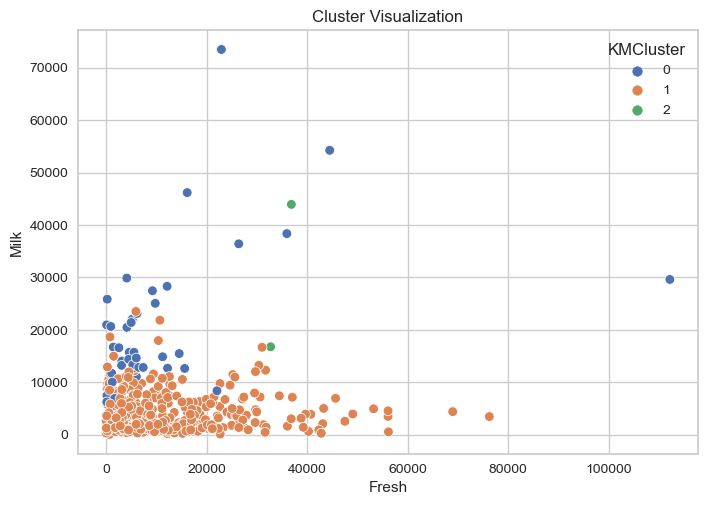

In [10]:
# Visualizing the clusters using a scatterplot ('Fresh' vs 'Milk')

sns.scatterplot(x='Fresh', 
                y='Milk', 
                data=input_data, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Cluster Visualization')

plt.show()

In [11]:
#Elbow Method

C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

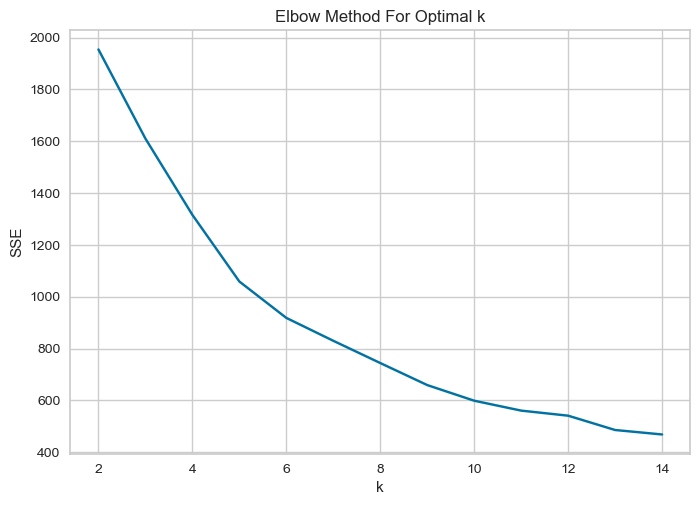

In [12]:
# Initializing an empty list to store the sum of squared distances for each value of k

Sum_of_squared_distances = [] 

# Defining the range of values for k (number of clusters)

K = range(2, 15)

# Iterating over each value of k

for k in K:
    # Creating a KMeans instance with the current value of k
    km = KMeans(n_clusters =k)
    
    # Create a KMeans instance with the current value of k
    km = km.fit(X_scaled)
    
    # Append the sum of squared distances to the list
    Sum_of_squared_distances.append(km.inertia_)

    
# Plotting the values of k against the corresponding sum of squared distances  
# Setting labels for the x and y axes
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
#Silhouette Coefficient

C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

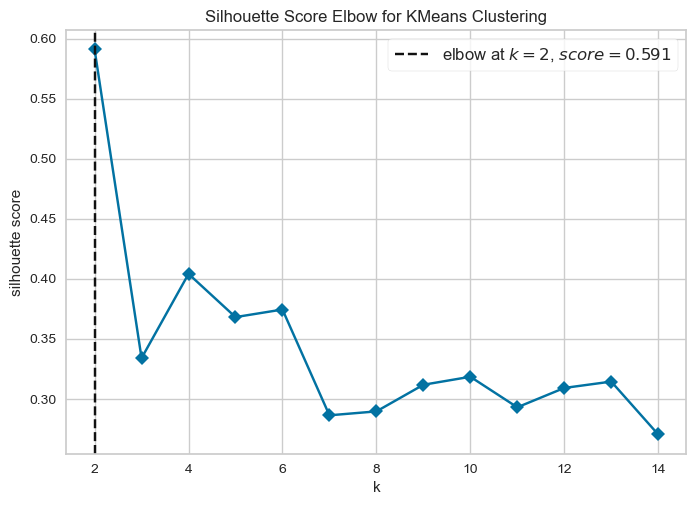

In [14]:
# Create a KMeans model with a specified random state for reproducibility

model = KMeans(random_state=123) 

# Instantiating a KElbowVisualizer object with the KMeans model
# The k parameter specifies the range of values for the number of clusters (k) to evaluate
visualizer = KElbowVisualizer(model, k=(2, 15), metric='silhouette', timings=False)

# Fitting the visualizer to the scaled data
visualizer.fit(X_scaled)   

# Finalizing and render the visualizer (displays the elbow plot)
visualizer.poof()
plt.show();

In [15]:
# Setting the optimal number of clusters (k) 
opt_k = 2

# Creating a KMeans model with the optimal number of clusters
kmodel = KMeans(n_clusters=opt_k)

# Fitting the KMeans model to the scaled data
kmodel.fit(X_scaled)

# Assign cluster labels to the data points and storing the cluster assignments
cluster_assignment = kmodel.labels_
cluster_assignment

C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
# Adding the cluster assignments to the original dataset

input_data["KMCluster"] = cluster_assignment
input_data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMCluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
5,9413,8259,5126,666,1795,1451,0
6,12126,3199,6975,480,3140,545,0
7,7579,4956,9426,1669,3321,2566,0
8,5963,3648,6192,425,1716,750,0
9,6006,11093,18881,1159,7425,2098,0


In [17]:
# Dispalying the centroids of the KMeans model

kmodel.cluster_centers_

array([[-0.00670029, -0.21151984, -0.23455562, -0.03442131, -0.23360924,
        -0.09446257],
       [ 0.06349325,  2.00440225,  2.22269372,  0.32618292,  2.2137257 ,
         0.8951453 ]])

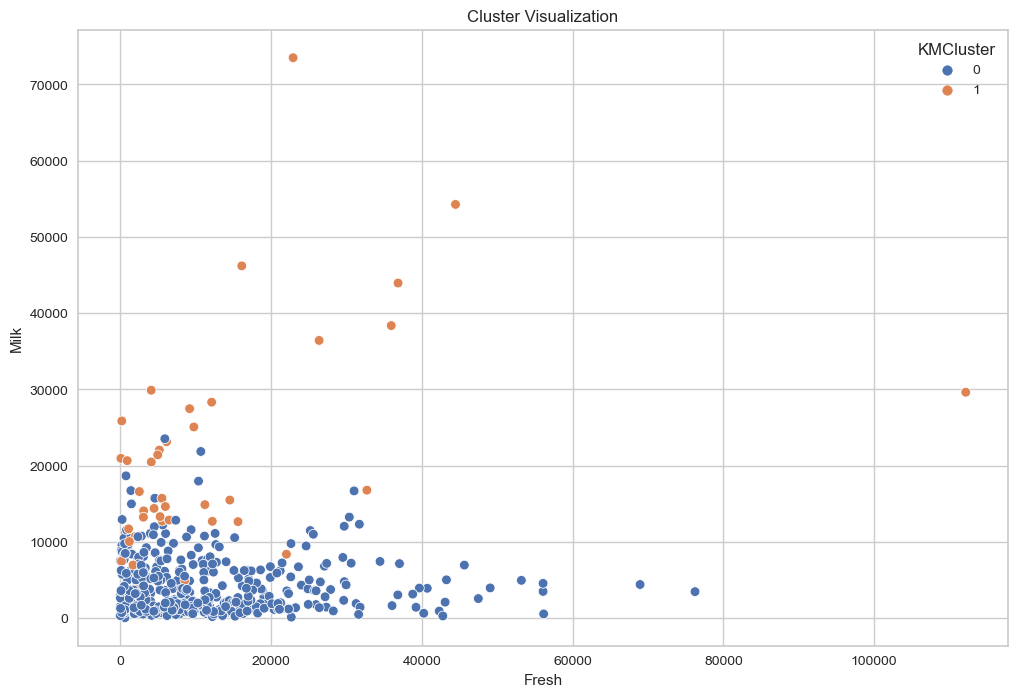

In [18]:
# Creating a scatter plot to visualize the clusters in the feature space

plt.figure(figsize=(12,8))
sns.scatterplot(x='Fresh', 
                y='Milk', 
                data=input_data, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Cluster Visualization')

plt.show()

In [19]:
# Performing Principal Component Analysis (PCA) with 2 components
# Transforming the scaled data into principal components
# Converting the principal component scores into a DataFrame
# Calculating the cumulative explained variance ratio
# Displaying the cumulative explained variance ratio

pca = PCA(n_components=2)
pc_scores = pca.fit_transform(X_scaled)
pc_scores = pd.DataFrame(pc_scores, columns=["PC1", "PC2"])
pca.explained_variance_ratio_.cumsum()

array([0.44082893, 0.72459292])

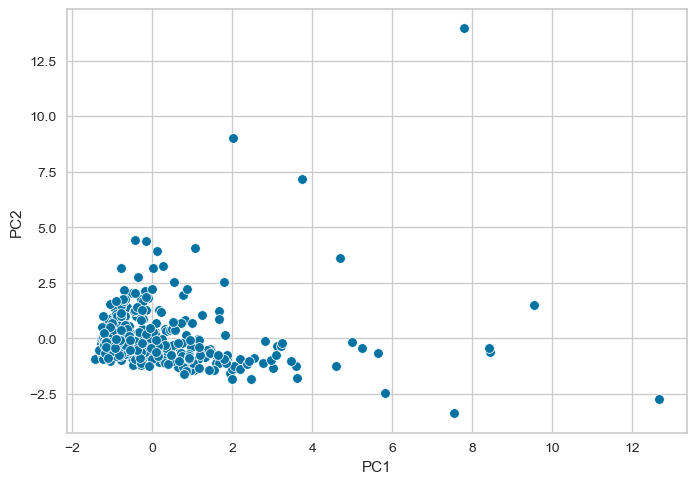

In [20]:
# Creating a scatter plot to visualize the principal component scores

sns.scatterplot(x="PC1", y="PC2", data=pc_scores)
plt.show();

In [21]:
# Creating a KMeans model with the optimal number of clusters
kmodel = KMeans(n_clusters=opt_k)

# Fitting the KMeans model to the principal component scores
kmodel.fit(pc_scores)

# Assigning cluster labels to the principal component scores
cluster_assignment = kmodel.labels_

# Adding the cluster assignments to the principal component scores DataFrame
pc_scores["KMCluster"] = cluster_assignment

# Displaying the first few rows of the DataFrame with cluster assignments
pc_scores.head()

C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,PC1,PC2,KMCluster
0,0.193291,-0.305100,1
1,0.434420,-0.328413,1
2,0.811143,0.815096,1
3,-0.778648,0.652754,1
4,0.166287,1.271434,1


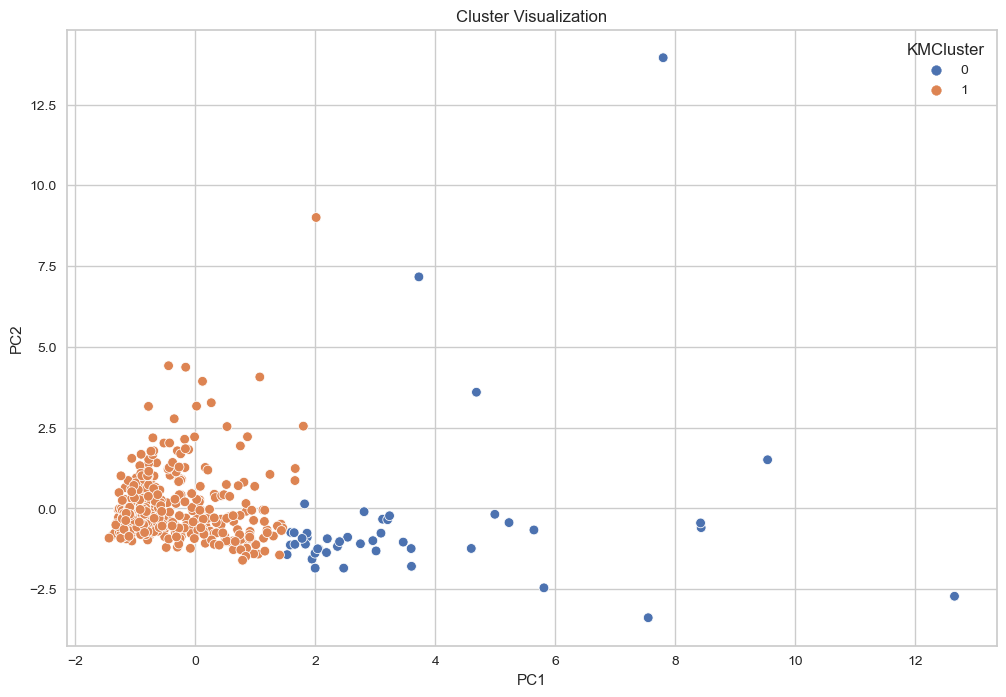

In [22]:
# Creating a scatter plot to visualize the clusters in the principal component space
# Plotting the principal component scores ('PC1', 'PC2') 

plt.figure(figsize=(12,8))

sns.scatterplot(x='PC1', 
                y='PC2', 
                data=pc_scores, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Cluster Visualization')

plt.show()

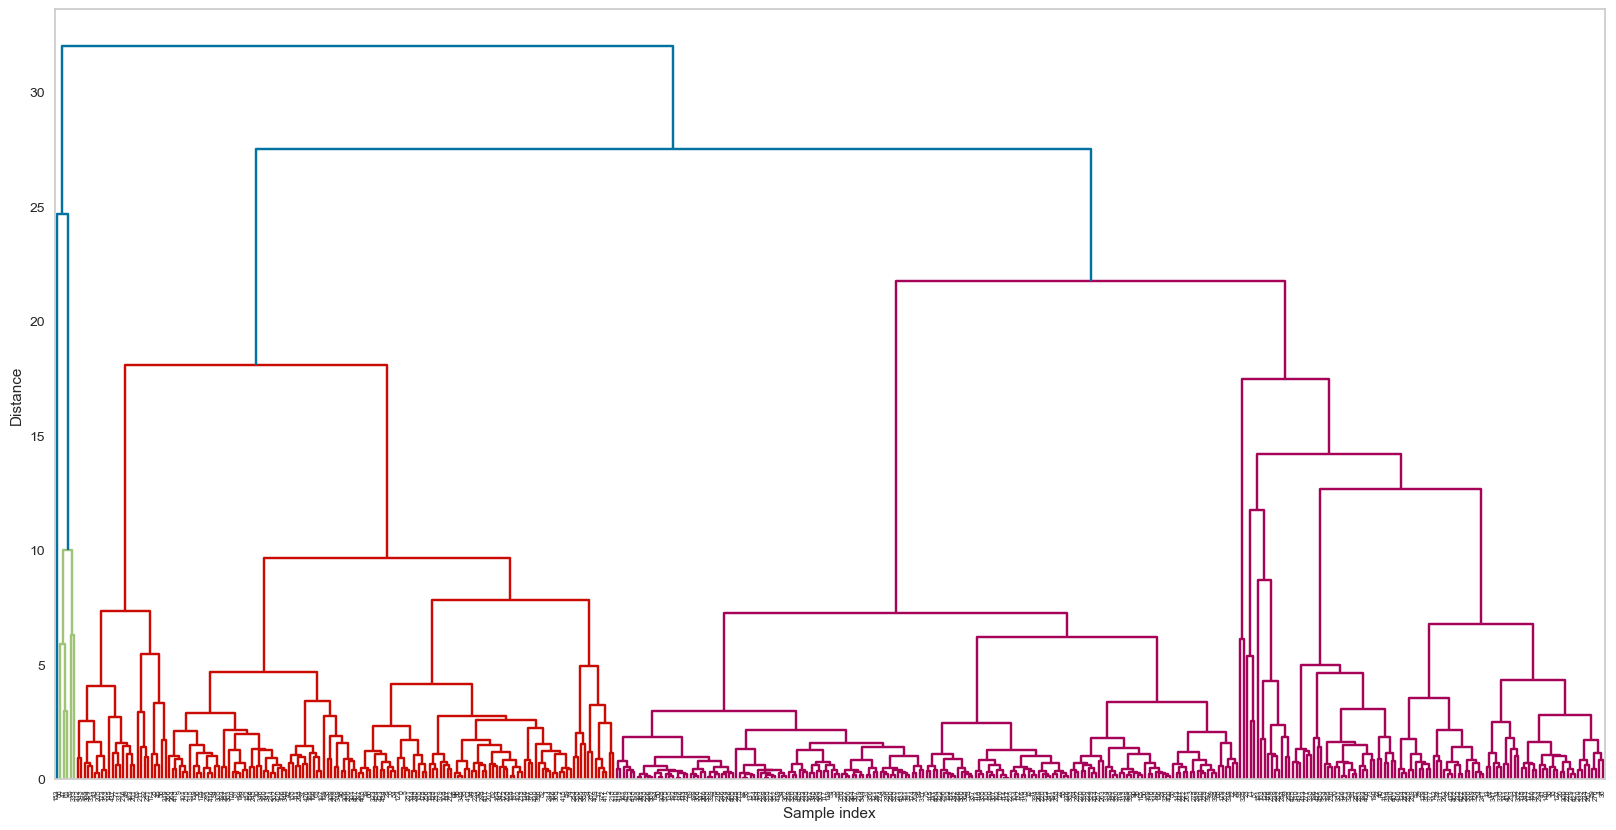

In [23]:
# Performing hierarchical clustering using the Ward method and Euclidean distance metric
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Drawing the dendrogram
plt.figure(figsize=(20,10))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.grid(False)
plt.show()

In [24]:
# Instantiating an AgglomerativeClustering object with specified parameters

agglomerative = AgglomerativeClustering(n_clusters = 5, 
                                        linkage    = 'ward', # merges two clusters if the resulting has small variance
                                        metric     = 'euclidean')
# Fitting the Agglomerative Clustering model to the scaled data
agglomerative.fit(X_scaled)

# Retrieving cluster assignments for each data point
cluster_assignment = agglomerative.labels_
cluster_assignment

array([0, 0, 0, 4, 2, 0, 0, 0, 4, 0, 0, 4, 2, 2, 2, 4, 0, 0, 2, 0, 2, 4,
       2, 2, 0, 0, 4, 4, 0, 2, 2, 4, 2, 2, 4, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 4, 4, 2, 0, 2, 4, 0, 0, 4, 0, 0, 1, 0, 0, 4, 0,
       0, 2, 4, 4, 2, 2, 4, 2, 0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0, 1, 1, 2,
       4, 2, 4, 2, 0, 2, 0, 4, 0, 4, 4, 4, 0, 0, 0, 2, 4, 4, 0, 0, 0, 0,
       4, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 2, 2, 2, 0, 2, 4, 4,
       4, 4, 4, 4, 0, 0, 2, 4, 2, 2, 2, 4, 0, 0, 4, 4, 4, 2, 4, 4, 4, 0,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 0,
       2, 2, 0, 4, 2, 2, 0, 3, 4, 0, 4, 0, 0, 0, 2, 4, 4, 0, 4, 2, 2, 0,
       4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 4, 0, 4,
       4, 0, 4, 4, 4, 4, 2, 4, 4, 4, 2, 0, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 0, 0, 4, 4, 0, 4, 4, 0, 4, 2, 0, 2, 0, 4, 2, 2, 4, 4, 2, 4,
       0, 0, 0, 2, 0, 4, 4, 4, 0, 2, 4, 4, 2, 2, 4, 2, 4, 0, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 4, 4, 0, 2, 4, 4, 0, 0, 4, 2,

In [25]:
# Adding the cluster assignments obtained from Agglomerative Clustering to the original dataset

input_data["HCACluster"] = cluster_assignment
input_data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMCluster,HCACluster
0,12669,9656,7561,214,2674,1338,0,0
1,7057,9810,9568,1762,3293,1776,0,0
2,6353,8808,7684,2405,3516,7844,0,0
3,13265,1196,4221,6404,507,1788,0,4
4,22615,5410,7198,3915,1777,5185,0,2
5,9413,8259,5126,666,1795,1451,0,0
6,12126,3199,6975,480,3140,545,0,0
7,7579,4956,9426,1669,3321,2566,0,0
8,5963,3648,6192,425,1716,750,0,4
9,6006,11093,18881,1159,7425,2098,0,0


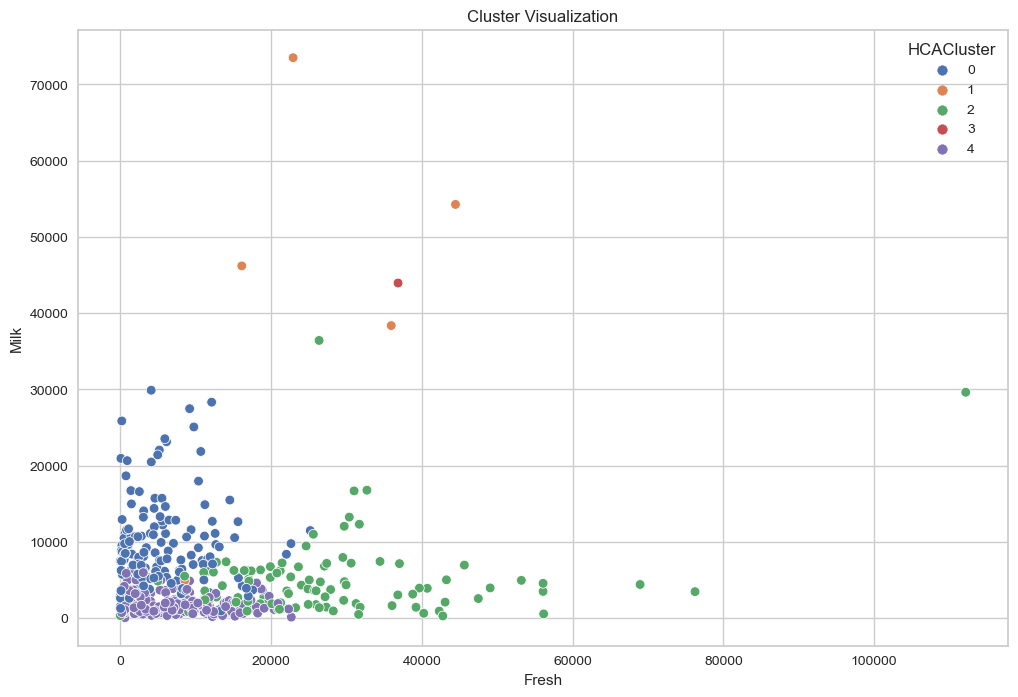

In [26]:
# Creating a scatter plot to visualize the clusters in the feature space
# Plotting the data points with 'Fresh' and 'Milk'

plt.figure(figsize=(12,8))

sns.scatterplot(x='Fresh', 
                y='Milk', 
                data=input_data, 
                hue= "HCACluster",
                palette="deep"
               ).set_title('Cluster Visualization')
plt.show()

In [27]:
# Instantiating a DBSCAN object with specified parameters
db = DBSCAN(eps=0.5, min_samples=5)

# Fitting the DBSCAN model to the scaled data
db.fit(X_scaled)

# Retrieving cluster assignments for each data point
cluster_assignment = db.labels_
cluster_assignment

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  1, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [28]:
# Printing the number of clusters found and the cluster labels

print ('Number of clusters found', len(np.unique(cluster_assignment)))
print ('Clusters found', np.unique(cluster_assignment))

Number of clusters found 3
Clusters found [-1  0  1]


In [29]:
# Adding cluster assignments to the original dataset

input_data['DBCluster'] = cluster_assignment
input_data.head(15)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMCluster,HCACluster,DBCluster
0,12669,9656,7561,214,2674,1338,0,0,0
1,7057,9810,9568,1762,3293,1776,0,0,0
2,6353,8808,7684,2405,3516,7844,0,0,-1
3,13265,1196,4221,6404,507,1788,0,4,0
4,22615,5410,7198,3915,1777,5185,0,2,-1
5,9413,8259,5126,666,1795,1451,0,0,0
6,12126,3199,6975,480,3140,545,0,0,0
7,7579,4956,9426,1669,3321,2566,0,0,0
8,5963,3648,6192,425,1716,750,0,4,0
9,6006,11093,18881,1159,7425,2098,0,0,-1


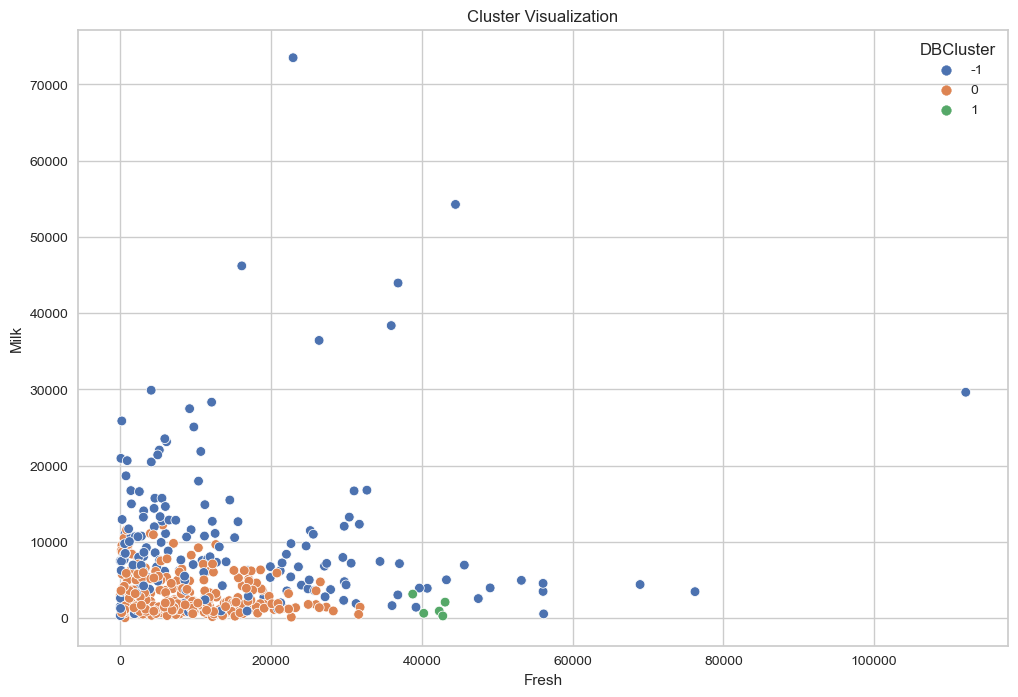

In [30]:
# Creating a scatter plot to visualize the clusters based on 'Fresh' and 'Milk' features

plt.figure(figsize=(12,8))

sns.scatterplot(x='Fresh', 
                y='Milk', 
                data=input_data, 
                hue= "DBCluster",
                palette="deep"
               ).set_title('Cluster Visualization')
plt.show()

In [31]:
eps  = np.linspace(.3, 2.0, 20)
mins = np.arange(3, 50, 2)
Z = np.zeros((len(eps), len(mins)))

for i, e in enumerate(eps):
    for j, m in enumerate(mins):
        db = DBSCAN(eps=e, min_samples=m)
        clusters_found = len(np.unique(db.fit_predict(X_scaled)))
        Z[i,j] = clusters_found

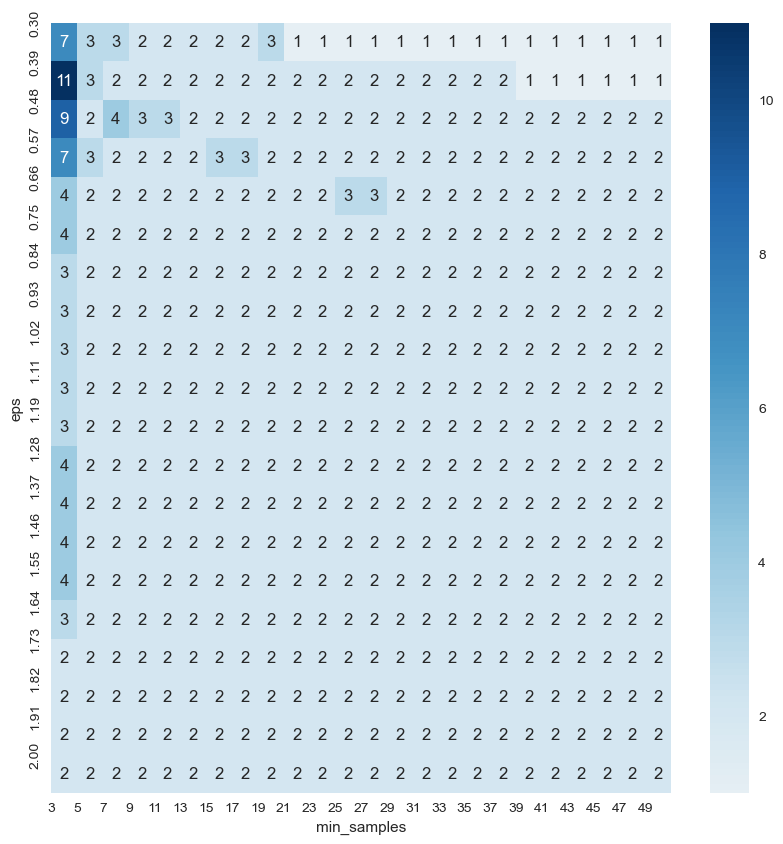

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(Z, cmap='RdBu', center=0, annot=True);
plt.xticks(np.arange(Z.shape[1]), mins)
plt.xlabel('min_samples')
plt.yticks(np.arange(Z.shape[0]), ['%0.2f' % x for x in eps])
plt.ylabel('eps')
plt.show()